In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv
import pandas as pd

In [193]:
df = pd.read_csv('D:\All in 1\italy\sapienza courses\BD\Project\WEBSTATS_LONG_PP_DATAFLOW_csv_col.csv')

In [194]:
df.head(10)

,FREQ,Frequency,REF_AREA,Reference area,Time Period,1927-Q1,1927-Q2,1927-Q3,1927-Q4,1928-Q1,...,2016-Q3,2016-Q4,2017-Q1,2017-Q2,2017-Q3,2017-Q4,2018-Q1,2018-Q2,2018-Q3,2018-Q4
0,Q,Quarterly,AU,Australia,Q:AU,NaN,NaN,NaN,NaN,NaN,...,411.1725,428.2286,437.6704,446.1983,445.2846,449.5487,446.5028,443.4573,436.7567,NaN
1,Q,Quarterly,BE,Belgium,Q:BE,NaN,NaN,NaN,NaN,NaN,...,264.1283,263.1915,265.9009,265.0400,273.9277,272.5349,272.6364,275.3205,281.0431,NaN
2,Q,Quarterly,CA,Canada,Q:CA,NaN,NaN,NaN,NaN,NaN,...,325.1008,329.8261,346.0497,368.1011,360.5406,358.6505,364.6359,371.7238,369.5187,NaN
3,Q,Quarterly,CH,Switzerland,Q:CH,NaN,NaN,NaN,NaN,NaN,...,155.8899,156.5623,157.4492,157.6445,157.1535,157.8075,157.1838,156.6814,157.3336,156.4416
4,Q,Quarterly,DE,Germany,Q:DE,NaN,NaN,NaN,NaN,NaN,...,119.5738,121.5762,120.3366,122.8158,124.8182,127.1067,126.9160,128.8231,131.4930,NaN
5,Q,Quarterly,DK,Denmark,Q:DK,NaN,NaN,NaN,NaN,NaN,...,297.3310,292.6071,298.9983,307.0568,311.2250,305.3895,316.7826,321.2287,322.3402,NaN
6,Q,Quarterly,ES,Spain,Q:ES,NaN,NaN,NaN,NaN,NaN,...,229.1667,229.9711,235.2321,239.9933,244.4285,246.5154,249.9288,256.3205,261.9296,NaN
7,Q,Quarterly,FI,Finland,Q:FI,NaN,NaN,NaN,NaN,NaN,...,264.8673,264.3408,268.0267,270.3963,268.8165,267.5001,267.7634,272.2392,NaN,NaN
8,Q,Quarterly,FR,France,Q:FR,NaN,NaN,NaN,NaN,NaN,...,245.6178,244.1786,245.6178,248.0164,253.5332,252.0940,252.8136,254.9724,260.7290,NaN
9,Q,Quarterly,GB,United Kingdom,Q:GB,NaN,NaN,NaN,NaN,NaN,...,377.8671,377.5321,378.2021,386.5768,395.2865,394.9515,393.9465,398.9714,407.3461,NaN


In [6]:
df.shape

(23, 373)

# **Data preprocessing**

**Cleaning Data:**

Addressing missing or invalid data:

In [7]:
df.drop(['REF_AREA','FREQ','Time Period','Frequency'], inplace=True, axis=1)
#df.head()
# [print(i) for i in df.isna().sum()]

In [8]:
len(df.columns)

369

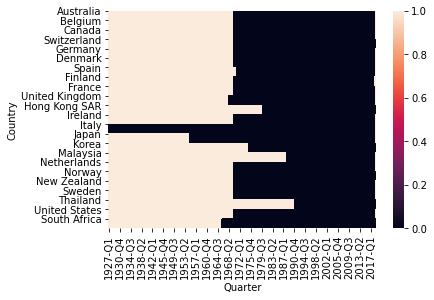

In [9]:
sns.heatmap(df[df.columns[1:]].isnull())
plt.yticks(range(23), df['Reference area'].unique(), rotation='horizontal')
plt.ylabel('Country')
plt.xlabel('Quarter')
plt.show()

In [10]:
df=df.dropna(axis=1,how='any')
#df.head(5)
len(df.columns)

111

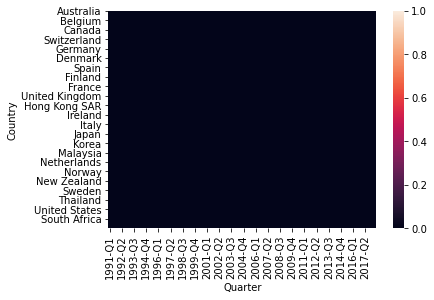

In [11]:
sns.heatmap(df[df.columns[1:]].isnull(), vmin=0, vmax=1)
plt.yticks(range(23), df['Reference area'].unique(), rotation='horizontal')
plt.ylabel('Country')
plt.xlabel('Quarter')
plt.show()

Sorting and reordering:

In [12]:
df.head()

,Reference area,1991-Q1,1991-Q2,1991-Q3,1991-Q4,1992-Q1,1992-Q2,1992-Q3,1992-Q4,1993-Q1,...,2016-Q1,2016-Q2,2016-Q3,2016-Q4,2017-Q1,2017-Q2,2017-Q3,2017-Q4,2018-Q1,2018-Q2
0,Australia,89.2978,90.3677,93.1177,93.1177,92.4977,92.7677,92.8477,93.7377,94.6276,...,397.1624,405.0811,411.1725,428.2286,437.6704,446.1983,445.2846,449.5487,446.5028,443.4573
1,Belgium,78.9600,77.7800,81.1800,82.2300,83.4000,85.4400,86.2800,86.3800,86.8700,...,254.6328,257.6460,264.1283,263.1915,265.9009,265.0400,273.9277,272.5349,272.6364,275.3205
2,Canada,97.4700,100.9300,95.2500,96.4000,98.0000,98.7600,99.0000,101.1400,102.0100,...,296.4340,313.9176,325.1008,329.8261,346.0497,368.1011,360.5406,358.6505,364.6359,371.7238
3,Switzerland,112.5025,113.2979,115.9373,113.0737,111.6748,110.2777,107.3488,106.0494,104.5704,...,154.7206,154.7948,155.8899,156.5623,157.4492,157.6445,157.1535,157.8075,157.1838,156.6814
4,Germany,85.2098,86.8477,87.6183,88.4226,89.7905,91.2376,92.2949,92.7171,93.9451,...,114.5200,117.8574,119.5738,121.5762,120.3366,122.8158,124.8182,127.1067,126.9160,128.8231


In [13]:
column_title = df.columns.to_list()

In [14]:
column_title.pop(0)

'Reference area'

In [15]:
column_title

['1991-Q1',
 '1991-Q2',
 '1991-Q3',
 '1991-Q4',
 '1992-Q1',
 '1992-Q2',
 '1992-Q3',
 '1992-Q4',
 '1993-Q1',
 '1993-Q2',
 '1993-Q3',
 '1993-Q4',
 '1994-Q1',
 '1994-Q2',
 '1994-Q3',
 '1994-Q4',
 '1995-Q1',
 '1995-Q2',
 '1995-Q3',
 '1995-Q4',
 '1996-Q1',
 '1996-Q2',
 '1996-Q3',
 '1996-Q4',
 '1997-Q1',
 '1997-Q2',
 '1997-Q3',
 '1997-Q4',
 '1998-Q1',
 '1998-Q2',
 '1998-Q3',
 '1998-Q4',
 '1999-Q1',
 '1999-Q2',
 '1999-Q3',
 '1999-Q4',
 '2000-Q1',
 '2000-Q2',
 '2000-Q3',
 '2000-Q4',
 '2001-Q1',
 '2001-Q2',
 '2001-Q3',
 '2001-Q4',
 '2002-Q1',
 '2002-Q2',
 '2002-Q3',
 '2002-Q4',
 '2003-Q1',
 '2003-Q2',
 '2003-Q3',
 '2003-Q4',
 '2004-Q1',
 '2004-Q2',
 '2004-Q3',
 '2004-Q4',
 '2005-Q1',
 '2005-Q2',
 '2005-Q3',
 '2005-Q4',
 '2006-Q1',
 '2006-Q2',
 '2006-Q3',
 '2006-Q4',
 '2007-Q1',
 '2007-Q2',
 '2007-Q3',
 '2007-Q4',
 '2008-Q1',
 '2008-Q2',
 '2008-Q3',
 '2008-Q4',
 '2009-Q1',
 '2009-Q2',
 '2009-Q3',
 '2009-Q4',
 '2010-Q1',
 '2010-Q2',
 '2010-Q3',
 '2010-Q4',
 '2011-Q1',
 '2011-Q2',
 '2011-Q3',
 '20

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Columns: 111 entries, Reference area to 2018-Q2
dtypes: float64(110), object(1)
memory usage: 20.1+ KB


In [17]:
# sns.pairplot(df)

In [18]:
df.shape

(23, 111)

In [19]:
df_countries=df.melt(id_vars=["Reference area"], 
        var_name="time-series", 
        value_name="price")

In [20]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reference area  2530 non-null   object 
 1   time-series     2530 non-null   object 
 2   price           2530 non-null   float64
dtypes: float64(1), object(2)
memory usage: 59.4+ KB


In [22]:
df_countries.columns = ['country','time','price']
df_countries.head()

,country,time,price
0,Australia,1991-Q1,89.2978
1,Belgium,1991-Q1,78.9600
2,Canada,1991-Q1,97.4700
3,Switzerland,1991-Q1,112.5025
4,Germany,1991-Q1,85.2098


In [23]:
df_countries.dtypes

country     object
time        object
price      float64
dtype: object

In [24]:
df_countries["price"] = df_countries["price"].apply(pd.to_numeric, errors='coerce')

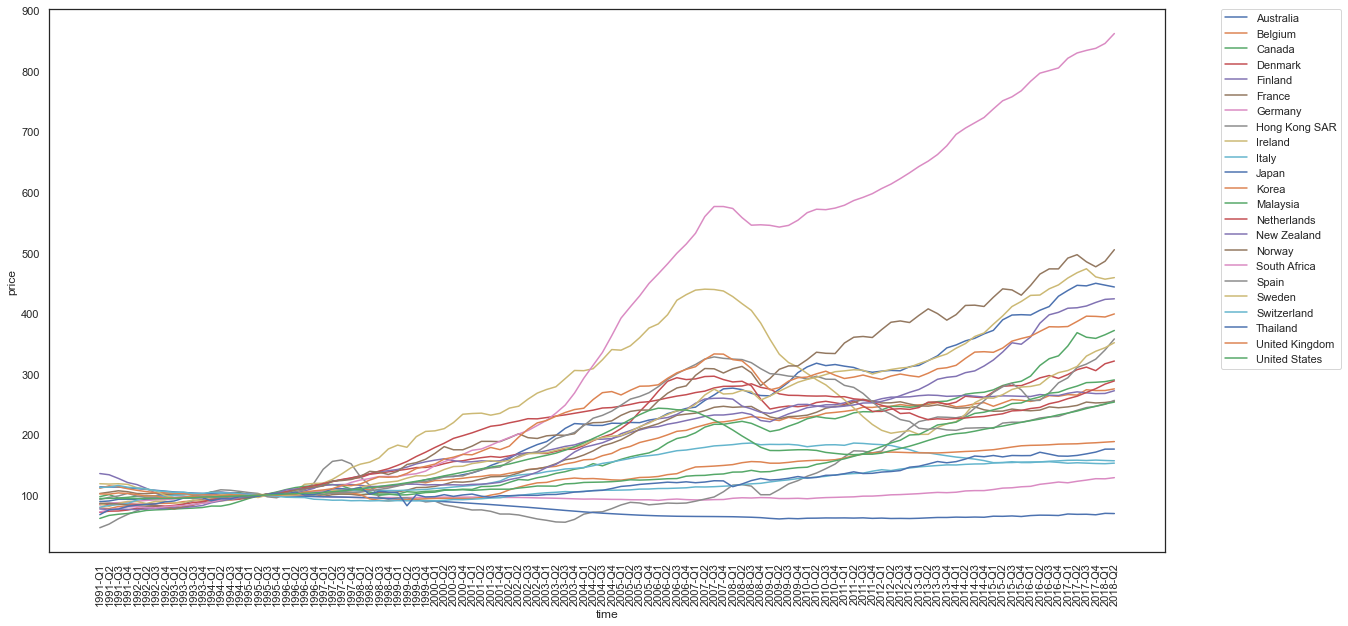

In [43]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
sns.lineplot(x="time", y="price", hue="country",palette='deep',data=df_countries)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
df_countries = df_countries.sort_values(['country', 'time'])

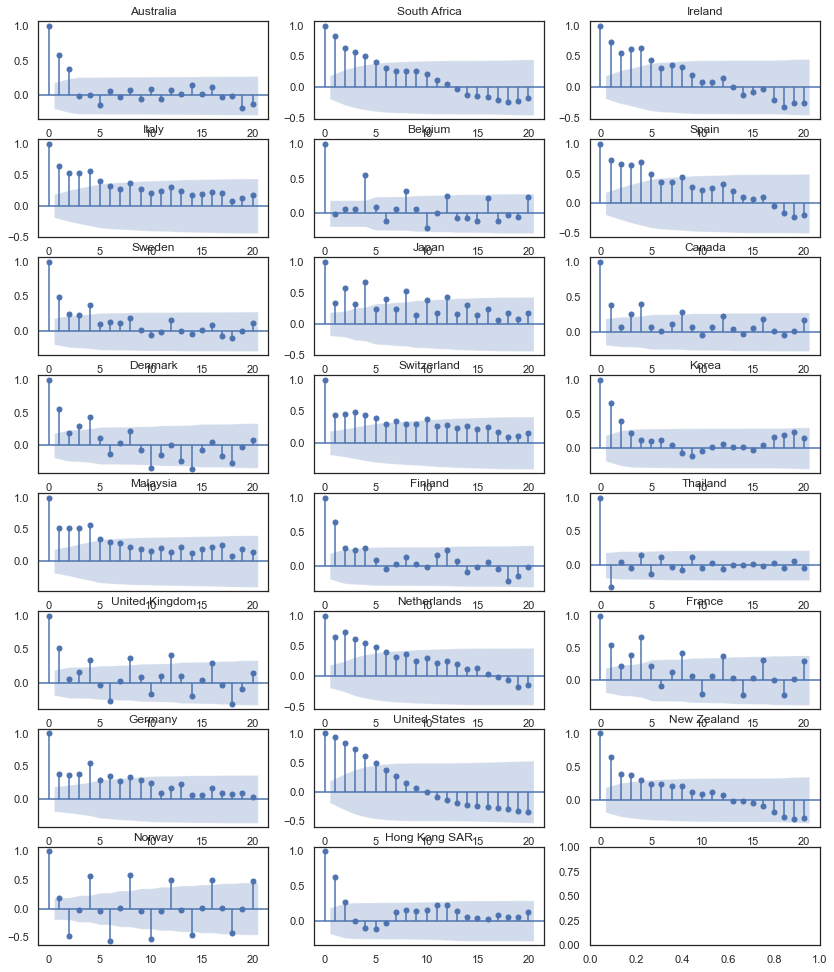

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, ax = plt.subplots(8,3,figsize=(14,17))
for i,country in enumerate(df_countries['country'].unique()):
    plot_acf(df_countries[df_countries['country'] == country].price.diff(-1)[0:-1], lags=20, ax=ax[i%8,i%3], title = country);

In [97]:
df_countries[df_countries['country'] == country].price.diff(-1)[0:-1]

21     -0.2866
44      0.0905
67      0.2702
90     -0.2048
113     0.1622
         ...  
2413   -3.3019
2436   -4.1618
2459   -3.7634
2482   -3.7896
2505   -3.0783
Name: price, Length: 109, dtype: float64

In [27]:
df_pivot = df_countries.pivot_table(values='price', index='time', columns='country').reset_index()

In [28]:
df_pivot

country,time,Australia,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong SAR,Ireland,...,Netherlands,New Zealand,Norway,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States
0,1991-Q1,89.2978,78.9600,97.4700,84.2021,135.5966,102.7100,85.2098,46.2255,85.9300,...,71.5527,77.1350,86.4814,72.3304,92.7000,118.8011,112.5025,67.7492,101.9892,94.3842
1,1991-Q2,90.3677,77.7800,100.9300,85.2621,133.6167,104.8500,86.8477,52.1901,81.4000,...,73.5542,76.3306,86.4814,75.3814,96.4000,118.2561,113.2979,75.8308,101.6275,94.6708
2,1991-Q3,93.1177,81.1800,95.2500,84.9121,127.5268,107.1700,87.6183,61.0438,86.4900,...,73.8044,76.9809,85.3215,78.2746,98.6500,118.8011,115.9373,77.0393,103.6166,94.5803
3,1991-Q4,93.1177,82.2300,96.4000,85.5321,120.7370,105.5900,88.4226,68.2199,89.5800,...,75.4156,76.5703,83.7017,80.5366,102.9500,117.7112,113.0737,81.4955,102.7125,94.3101
4,1992-Q1,92.4977,83.4000,98.0000,84.9521,117.3471,102.6500,89.7905,74.1845,89.3700,...,78.5279,76.1938,81.5619,80.9048,98.3000,112.2616,111.6748,83.6103,101.0850,94.5149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2017-Q2,446.1983,265.0400,368.1011,307.0568,270.3963,248.0164,122.8158,310.6865,312.3552,...,263.1980,409.1734,496.7464,829.5964,239.9933,467.0125,157.6445,165.5213,386.5768,238.7396
106,2017-Q3,445.2846,273.9277,360.5406,311.2250,268.8165,253.5332,124.8182,316.2473,329.4152,...,269.4124,412.0829,485.0330,833.8288,244.4285,473.5234,157.1535,168.0756,395.2865,242.9014
107,2017-Q4,449.5487,272.5349,358.6505,305.3895,267.5001,252.0940,127.1067,324.3554,337.3840,...,275.6266,417.9360,476.7899,837.2607,246.5154,460.1410,157.8075,171.0131,394.9515,246.6648
108,2018-Q1,446.5028,272.6364,364.6359,316.7826,267.7634,252.8136,126.9160,339.5154,343.2205,...,283.2116,423.0189,485.9006,845.3393,249.9288,456.3214,157.1838,175.8663,393.9465,250.4544


In [101]:
df_pivot[df_pivot.columns[1:]].diff(-1).iloc[0:-1,:]

country,Australia,Belgium,Canada,Denmark,Finland,France,Germany,Hong Kong SAR,Ireland,Italy,...,Netherlands,New Zealand,Norway,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States
0,-1.0699,1.1800,-3.4600,-1.0600,1.9799,-2.1400,-1.6379,-5.9646,4.5300,-2.9541,...,-2.0015,0.8044,0.0000,-3.0510,-3.7000,0.5450,-0.7954,-8.0816,0.3617,-0.2866
1,-2.7500,-3.4000,5.6800,0.3500,6.0899,-2.3200,-0.7706,-8.8537,-5.0900,-1.2353,...,-0.2502,-0.6503,1.1599,-2.8932,-2.2500,-0.5450,-2.6394,-1.2085,-1.9891,0.0905
2,0.0000,-1.0500,-1.1500,-0.6200,6.7898,1.5800,-0.8043,-7.1761,-3.0900,-2.0331,...,-1.6112,0.4106,1.6198,-2.2620,-4.3000,1.0899,2.8636,-4.4562,0.9041,0.2702
3,0.6200,-1.1700,-1.6000,0.5800,3.3899,2.9400,-1.3679,-5.9646,0.2100,-5.5465,...,-3.1123,0.3765,2.1398,-0.3682,4.6500,5.4496,1.3989,-2.1148,1.6275,-0.2048
4,-0.2700,-2.0400,-0.7600,0.0000,6.1599,0.2800,-1.4471,-6.7102,3.2200,-3.7614,...,1.5312,-1.1123,-0.4339,1.4729,2.2300,2.1799,1.3971,-1.2084,2.5317,0.1622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,-8.5279,0.8609,-22.0514,-8.0585,-2.3696,-2.3986,-2.4792,-17.1481,-6.7341,-0.7701,...,-4.0641,-0.7874,-5.6399,-8.7437,-4.7612,-8.8120,-0.1953,-1.2772,-8.3747,-3.3019
105,0.9137,-8.8877,7.5605,-4.1682,1.5798,-5.5168,-2.0024,-5.5608,-17.0600,0.6161,...,-6.2144,-2.9095,11.7134,-4.2324,-4.4352,-6.5109,0.4910,-2.5543,-8.7097,-4.1618
106,-4.2641,1.3928,1.8901,5.8355,1.3164,1.4392,-2.2885,-8.1081,-7.9688,0.6161,...,-6.2142,-5.8531,8.2431,-3.4319,-2.0869,13.3824,-0.6540,-2.9375,0.3350,-3.7634
107,3.0459,-0.1015,-5.9854,-11.3931,-0.2633,-0.7196,0.1907,-15.1600,-5.8365,0.3079,...,-7.5850,-5.0829,-9.1107,-8.0786,-3.4134,3.8196,0.6237,-4.8532,1.0050,-3.7896


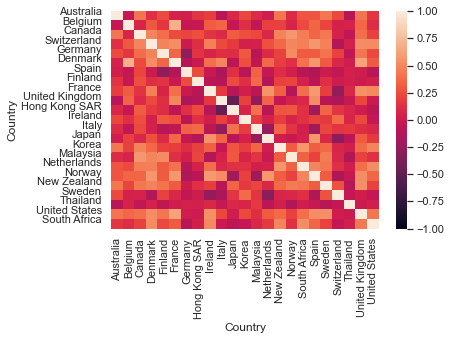

In [102]:
df_pivot[df_pivot.columns[1:]].corr()

sns.heatmap(df_pivot[df_pivot.columns[1:]].diff(-1).iloc[0:-1,:].corr(), vmin=-1, vmax=1)
plt.yticks(range(23), df['Reference area'].unique(), rotation='horizontal')
plt.ylabel('Country')
plt.xlabel('Country')
plt.show()

In [29]:
df_total = df_countries.merge(df_pivot, how='left', on='time')
df_total['key'] = df_total['country']

In [30]:
from sklearn.preprocessing import OneHotEncoder
country_ohe = OneHotEncoder()
country_ohe.fit(df_total['country'].values.reshape(-1,1))

OneHotEncoder()

In [31]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
cols = df_total['country'].unique()
X = []
Y = []
for country in cols:
    data = df_total[df_total['country'] == country]
    g = TimeseriesGenerator(data[cols].values, data['price'].values, length=50, batch_size=10000)
    samples = g.__getitem__(0)
    c = country_ohe.transform(np.array([country]*samples[0].shape[0]).reshape(-1,1)).toarray()
    x = np.concatenate([np.expand_dims(c,1), samples[0]], axis=1).reshape(samples[0].shape[0],-1)
    y = samples[1]
    X.append(x)
    Y.append(y)

In [32]:
X = np.concatenate(X)
Y = np.concatenate(Y)

In [33]:
X.shape

(1380, 1173)

In [34]:
Y.shape

(1380,)

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'learning_rate': [0.01, 0.1],
                 'max_depth': [2, 3 ],
                 'min_samples_split': [2 , 3]
                 }]


# step-3: perform grid search
# 3.1 specify model
gb = GradientBoostingRegressor(validation_fraction=0.1, n_iter_no_change=20, n_estimators=1000)
            

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = gb, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = 8)      

# fit the model
model_cv.fit(X, Y) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed: 34.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=GradientBoostingRegressor(n_estimators=1000,
                                                 n_iter_no_change=20),
             n_jobs=8,
             param_grid=[{'learning_rate': [0.01, 0.1], 'max_depth': [2, 3],
                          'min_samples_split': [2, 3]}],
             return_train_score=True, scoring='r2', verbose=1)

In [39]:
model_cv.score(X,Y)

0.9995807457183483

In [40]:
model_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 3}

In [41]:
model_cv.best_estimator_.score(X,Y)

0.9995807457183483

Text(0, 0.5, 'MSE')

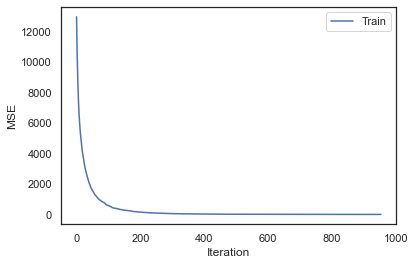

In [93]:
plt.plot(model_cv.best_estimator_.train_score_, label = 'Train')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')

In [175]:
P = model_cv.best_estimator_.predict(X)

In [178]:
l = []
for i in range(1380):
    l.append([country_ohe.inverse_transform(X[i,0:23].reshape(1,-1))[0][0], Y[i], P[i]])

In [170]:
l

[['Australia', 210.1547],
 ['Australia', 218.0738],
 ['Australia', 217.1601],
 ['Australia', 215.0279],
 ['Australia', 215.0279],
 ['Australia', 218.6829],
 ['Australia', 218.3784],
 ['Australia', 219.9011],
 ['Australia', 219.5966],
 ['Australia', 223.8607],
 ['Australia', 226.2971],
 ['Australia', 234.5207],
 ['Australia', 238.7848],
 ['Australia', 243.0486],
 ['Australia', 245.1808],
 ['Australia', 256.1454],
 ['Australia', 265.2824],
 ['Australia', 275.3333],
 ['Australia', 276.5516],
 ['Australia', 274.1151],
 ['Australia', 268.0237],
 ['Australia', 264.3687],
 ['Australia', 263.7596],
 ['Australia', 274.7242],
 ['Australia', 286.298],
 ['Australia', 302.1358],
 ['Australia', 311.5773],
 ['Australia', 317.66900000000004],
 ['Australia', 313.7095],
 ['Australia', 315.5368],
 ['Australia', 312.7958],
 ['Australia', 310.6636],
 ['Australia', 305.1813],
 ['Australia', 302.7449],
 ['Australia', 304.5722],
 ['Australia', 305.7904],
 ['Australia', 305.1813],
 ['Australia', 311.8822],
 ['

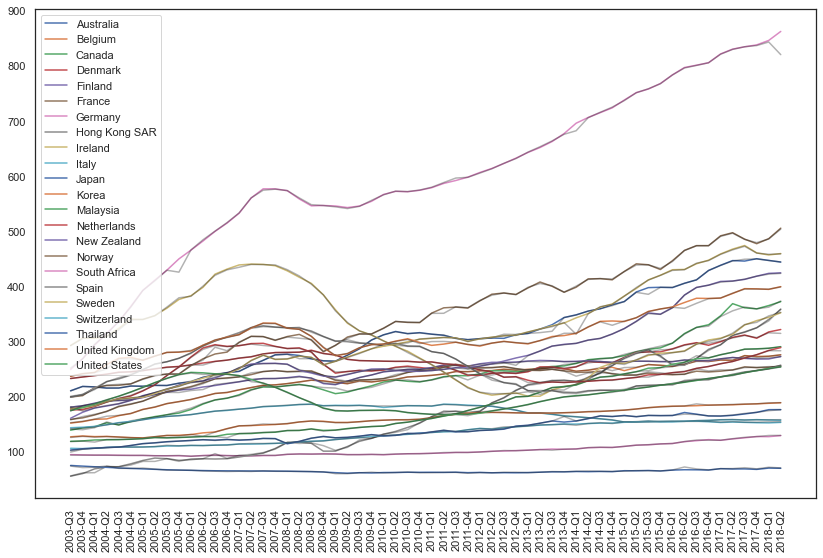

In [191]:
plt.figure(figsize=(14,9))
for country in df_total['country'].unique():
    plt.plot([x[1] for x in l if x[0] == country], label=country)
    plt.plot([x[2] for x in l if x[0] == country], color='black', alpha=0.3)
plt.xticks(range(60), df_total[df_total['country'] == 'Canada']['time'].values[50:], rotation='vertical');
plt.legend();

In [81]:
test = [model_cv.cv_results_['split{}_test_score'.format(i)][3] for i in range(5)]

In [82]:
test

[0.9492541957403466,
 0.9454495458098051,
 0.9526476662236721,
 0.9509424070132994,
 0.9440703183006645]

In [83]:
train = [model_cv.cv_results_['split{}_train_score'.format(i)][3] for i in range(5)]

In [84]:
train

[0.9591265542550872,
 0.9544193480028517,
 0.9501771868184419,
 0.9632419514611905,
 0.9582484971777491]